# This notebook is dediacted to the evaluation and comparison of our persistence and more complex model 

## I - Downloading of the model 

Lets download the prediction from the persistence model and evaluate it to have a baseline 

In [3]:
import numpy as np 

Y_pred = np.load('/Users/lacottepaul/Desktop/weather-nowcasting/data/Y_pred.npy')
Y_true = np.load('/Users/lacottepaul/Desktop/weather-nowcasting/data/Y_true.npy')

## II - Choice of metrics 

Here the goal is to predict an image from an image, therefore we want to compare images on a pixel to pixel base. As we are not doing an advanced research project we can maybe for now stay with some common metrics such as MAE:

$$
\mathrm{MAE} = \frac{1}{N} \sum_{i=1}^{N} \left| \hat{y}_i - y_i \right|
$$

Which will allow us to have an idea of the mean error across an image.
Another metric we can use, that is commonly used in analysis of meteorological images is RMSE which will give us a closer insight about the 'bigger' errors. 

$$
\mathrm{RMSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( \hat{y}_i - y_i \right)^2 }
$$

## III - Evaluation of the persistence model

In [17]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

start_time = time.time()

mae = mean_absolute_error(Y_true.flatten(), Y_pred.flatten())
rmse = mean_squared_error(Y_true.flatten(), Y_pred.flatten())

end_time = time.time()
elapsed_time = end_time - start_time

print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Running time : {elapsed_time:.4f} s")

MAE : 0.0147
RMSE : 0.0004
Running time : 0.0129 s


In [22]:
import matplotlib.pyplot as plt
import numpy as np

error_map = np.abs(Y_true[0] - Y_pred[0])
print("Min erreur absolue :", error_map.min())
print("Max erreur absolue :", error_map.max())


Min erreur absolue : 0.0
Max erreur absolue : 0.09924972


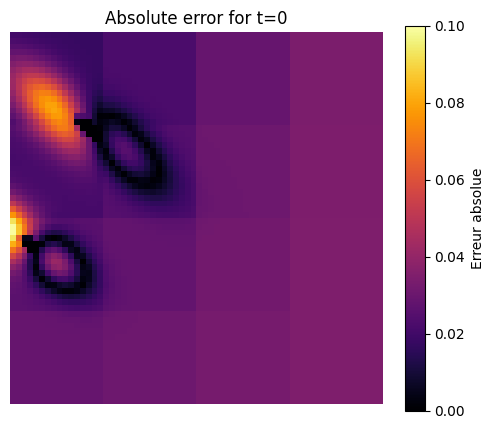

In [23]:
plt.figure(figsize=(6, 5))
plt.imshow(error_map, cmap='inferno',vmin=0, vmax=0.1)
plt.title("Absolute error for t=0")
plt.colorbar(label="Erreur absolue")
plt.axis("off")
plt.show()

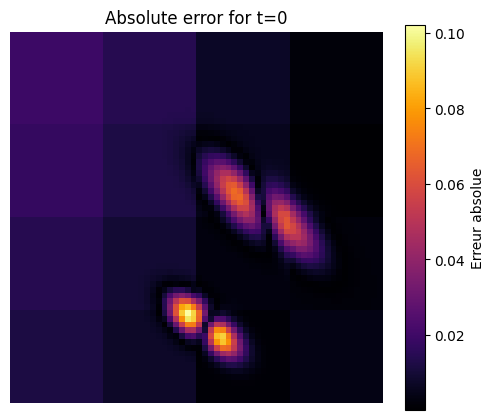

In [20]:
import matplotlib.pyplot as plt
import numpy as np

error_map = np.abs(Y_true[48] - Y_pred[48])

plt.figure(figsize=(6, 5))
plt.imshow(error_map, cmap='inferno')
plt.title("Absolute error for t=48")
plt.colorbar(label="Erreur absolue")
plt.axis("off")
plt.show()

As we only have a few precipitations over the whole image, the persistence model is able to get quite 'good' acuracy by just predicting the same or nearly the same as t=i for t=i+1 and adjusting a little bit for t=i+2. 

The goal is now to compare to the performance of a more complex model. 